In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import warnings
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
from scratch_linear_regression import ScratchLinearRegression as LR
import warnings
warnings.simplefilter("ignore")

In [2]:
df_train = pd.read_csv("archive/train.csv")
df_test = pd.read_csv("archive/test.csv")

In [3]:
df_train.info()
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       700 non-null    float64
 1   y       699 non-null    float64
dtypes: float64(2)
memory usage: 11.1 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       300 non-null    int64  
 1   y       300 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 4.8 KB


訓練データに１行だけ欠損値があるが、平均値で補間する

In [4]:
df_train = df_train.fillna(df_train.y.mean())

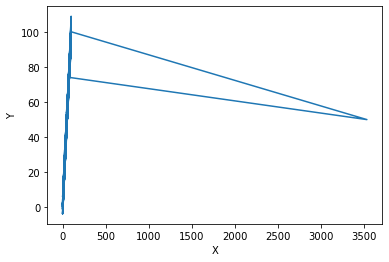

In [5]:
plt.plot(df_train.x,df_train.y)
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

明らかな外れ値が含まれているため確認する

In [6]:
display(df_train.describe())

,x,y
count,700.000000,700.000000
mean,54.985939,49.939869
std,134.681703,29.088388
min,0.000000,-3.839981
25%,25.000000,24.985830
50%,49.000000,49.095828
75%,75.000000,74.880631
max,3530.157369,108.871618


分位数を用いてこの外れ値を削除する

In [7]:
q = df_train.x.quantile(0.99)
df_train = df_train[df_train.x < q] 

In [8]:
df_train.describe()

,x,y
count,690.000000,690.000000
mean,49.362319,49.279690
std,28.570170,28.711415
min,0.000000,-3.839981
25%,25.000000,24.668086
50%,49.000000,48.757174
75%,74.000000,73.805870
max,99.000000,102.495945


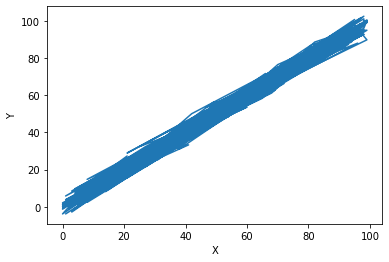

In [9]:
plt.plot(df_train.x,df_train.y)
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

In [38]:
train_x,train_y = df_train.x,df_train.y
test_x,test_y = df_test.x,df_test.y

In [39]:
train_x,valid_x,train_y,valid_y = \
train_test_split(np.array(train_x),np.array(train_y),train_size=0.5,random_state=42)

In [41]:
scratch_lr = LR(verbose=False,lr=1e-5,num_iter=1000)
lr = LinearRegression()
scratch_lr.fit(train_x,train_y,valid_x,valid_y)
lr.fit(train_x.reshape(-1,1),train_y.reshape(-1,1))

LinearRegression()

In [42]:
y_pred = scratch_lr.predict(test_x)
true_pred = lr.predict(np.array(test_x).reshape(-1,1))
print("平均2乗誤差(スクラッチ):{}".format(mean_squared_error(y_pred,np.array(test_y))))
print("平均2乗誤差(scikit-learn):{}".format(mean_squared_error(true_pred,test_y)))

平均2乗誤差(スクラッチ):9.864701189053106
平均2乗誤差(scikit-learn):9.36969752369162


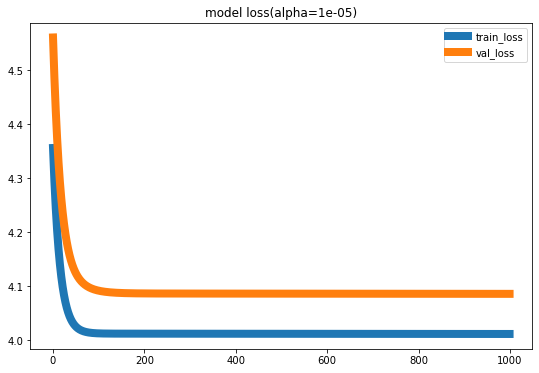

In [43]:
fig,ax = plt.subplots(1,1,figsize=(9,6))
ax.set_title("model loss(alpha={})".format(scratch_lr.lr))
ax.plot(np.arange(len(scratch_lr.loss)),scratch_lr.loss,label="train_loss",linewidth=8)
ax.plot(np.arange(len(scratch_lr.val_loss)),scratch_lr.val_loss,label="val_loss",linewidth=8)
ax.legend()
plt.show()

損失関数はこのように、ある程度のところまでは下がった。